**Importing Libs**

In [68]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from skimage import io
import numpy as np
from PIL import Image, ImageChops

**Importing and Plotting Original Image**

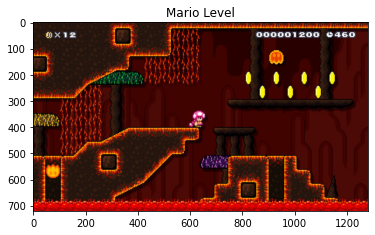

(720, 1280, 3)
<class 'numpy.ndarray'>


In [69]:
#from google.colab import drive
#drive.mount('/content/drive')
#map = '/content/drive/MyDrive/Colab Notebooks/mario_map.jpg' #local file
#map = img.imread(map)

map = io.imread('https://i.ibb.co/wpmXmbR/mario-map.jpg') #web link
map_array = np.asarray(map)
height = map_array.shape[0]  
width = map_array.shape[1]
plt.imshow(map_array)
plt.title("Mario Level")
plt.show()
print(map.shape)
print(type(map))

**Creating a Circular Gradient Function**

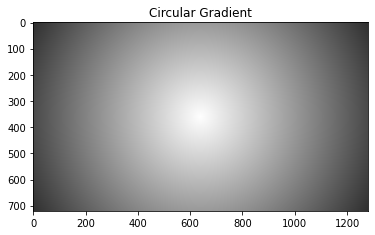

(720, 1280, 3)
<class 'numpy.ndarray'>


In [70]:
arr = np.zeros((width, height,3), dtype=np.uint8)
imgsize = arr.shape[:2]
outerColor = (0, 0, 0) #black
innerColor = (255, 255, 255) #white

def euclidean_distance(x,y,width,height):
  return np.sqrt((x - width//2)**2 + (y - height//2)**2)

for y in range(height):
    for x in range(width):
        #Euclidean Distance to Center
        distanceToCenter = euclidean_distance(x,y,width,height)

        #Make it on a scale from 0 to 1innerColor
        distanceToCenter = (distanceToCenter/(np.sqrt(2) * width/2))*var

        #Calculate r, g, and b values
        r = outerColor[0]*distanceToCenter + innerColor[0]*(1 - distanceToCenter)
        g = outerColor[1]*distanceToCenter + innerColor[1]*(1 - distanceToCenter)
        b = outerColor[2]*distanceToCenter + innerColor[2]*(1 - distanceToCenter)
        # print r, g, b
        arr[x, y] = (int(r), int(g), int(b))

grad = cv2.rotate(arr, cv2.ROTATE_90_CLOCKWISE) #rotating arr in 90º degrees
plt.imshow(grad)
plt.title("Circular Gradient")
plt.show()
print(grad.shape)
print(type(grad))

**Multiplying Original Map with Gradient**

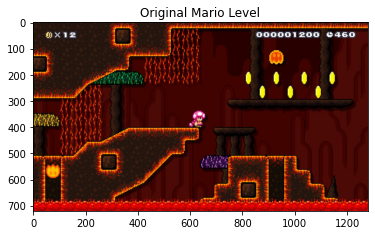

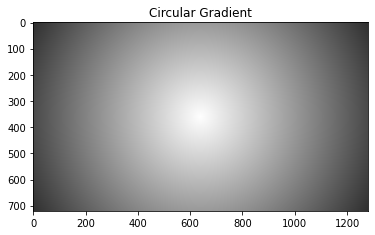

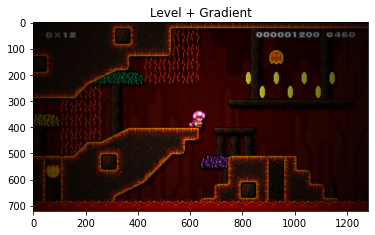

In [71]:
#Converting array to type Image
map_img = Image.fromarray(map)
grad_img = Image.fromarray(grad)

final_map = ImageChops.multiply(map_img, grad_img) #multiplying map with gradient

plt.imshow(map)
plt.title("Original Mario Level")
plt.show()
plt.imshow(grad)
plt.title("Circular Gradient")
plt.show()
plt.imshow(final_map)
plt.title("Level + Gradient")
plt.show()